In [68]:
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
original = pd.read_csv("../outputs/waterlevel.csv")
original.shape

(141, 4)

In [70]:
prediction_readings = pd.read_csv("../outputs/gauge_readings.csv")
prediction_readings.shape

(141, 3)

In [71]:
original[original["Water Level"].isnull()]

,Image Name,Water Level,Gauge ID,Notes


In [72]:
prediction_readings[prediction_readings["gauge_reading"].isnull()]

,image,is_valid_gauge,gauge_reading
1,2.png,False,NaN
4,5.png,False,NaN
13,14.png,True,NaN
18,19.png,False,NaN
37,38.png,True,NaN
78,79.png,True,NaN
79,80.png,False,NaN


In [73]:
df = original.copy()
df["predicted_gauge_reading"] = prediction_readings["gauge_reading"]

In [74]:
# replace null gauge_reading with -1
df["predicted_gauge_reading"].fillna(-1, inplace=True)
df[df["predicted_gauge_reading"]==-1]

/tmp/ipykernel_6344/237595213.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["predicted_gauge_reading"].fillna(-1, inplace=True)


,Image Name,Water Level,Gauge ID,Notes,predicted_gauge_reading
1,2,1.50,LA1004,Blury,-1.0
4,5,0.86,LA1007,NaN,-1.0
13,14,1.10,LA1016,NaN,-1.0
18,19,1.04,LA1021,NaN,-1.0
37,38,3.10,LA1040,NaN,-1.0
78,79,2.00,LA1081,NaN,-1.0
79,80,2.30,LA1082,NaN,-1.0


In [75]:
# set predicted gauge value below -2 to actual*-1
df.loc[df["predicted_gauge_reading"] < -2, "predicted_gauge_reading"] = df["predicted_gauge_reading"] * (-1)

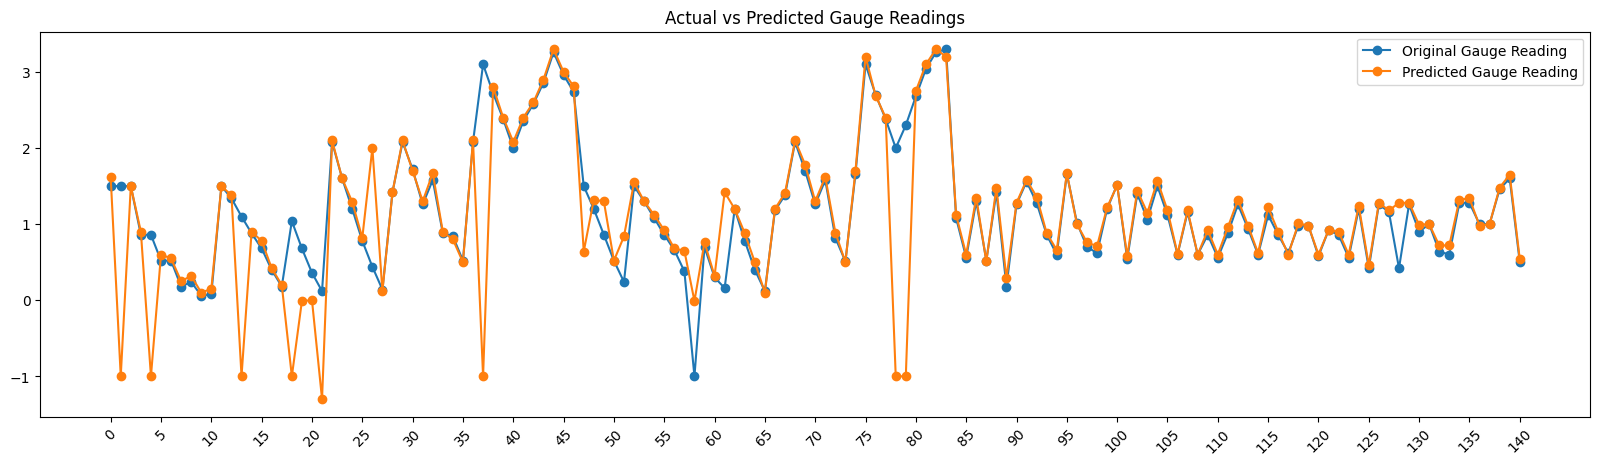

In [76]:
plt.figure(figsize=(20, 5))
plt.plot(df["Water Level"], marker='o', label='Original Gauge Reading')
plt.plot(df["predicted_gauge_reading"], marker='o', label="Predicted Gauge Reading")

# x label in 5 interval
plt.xticks(range(0, len(original), 5), rotation=45)
plt.legend()
plt.title("Actual vs Predicted Gauge Readings")
plt.show()

In [77]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(df["Water Level"], df["predicted_gauge_reading"])
print(f"Mean Squared Error: {rmse}")

Mean Squared Error: 0.6792314179636688


In [79]:
# number of negative predictions
negative_predictions = df[df["predicted_gauge_reading"] < 0]
print(f"Number of disregarded: {len(negative_predictions)}")
negative_predictions.head(10)

Number of disregarded: 10


,Image Name,Water Level,Gauge ID,Notes,predicted_gauge_reading
1,2,1.50,LA1004,Blury,-1.00
4,5,0.86,LA1007,NaN,-1.00
13,14,1.10,LA1016,NaN,-1.00
18,19,1.04,LA1021,NaN,-1.00
19,20,0.68,LA1022,NaN,-0.01
21,22,0.12,LA1024,Reflection,-1.30
37,38,3.10,LA1040,NaN,-1.00
58,59,-1.00,LA1061,Water out of image,-0.01
78,79,2.00,LA1081,NaN,-1.00
79,80,2.30,LA1082,NaN,-1.00


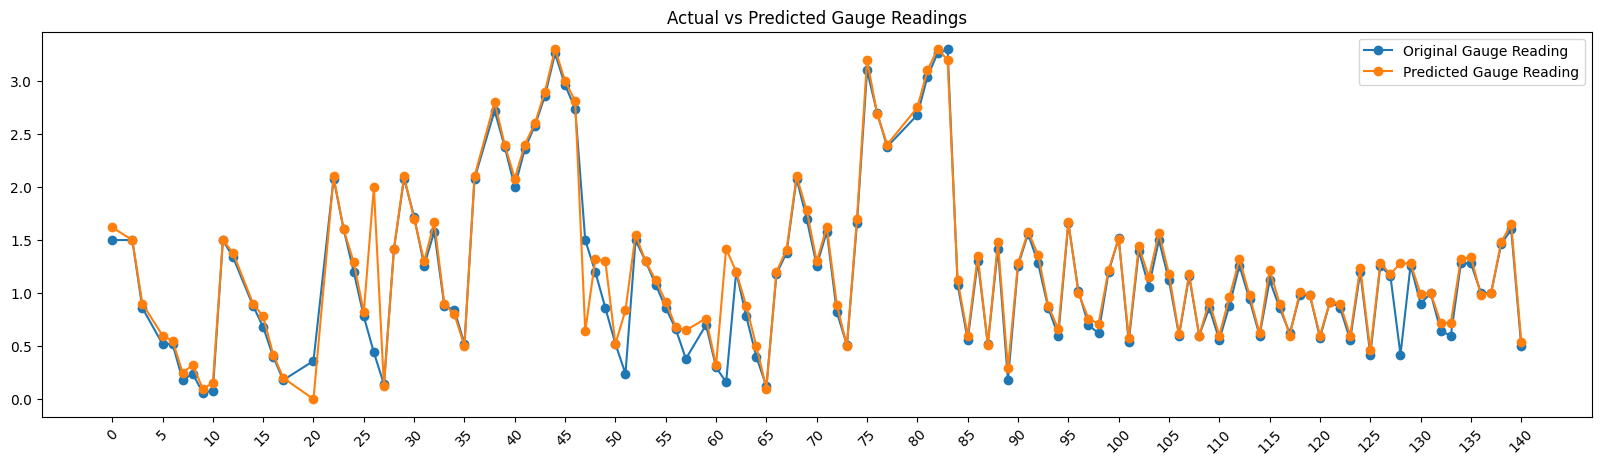

In [64]:
# drop negative gauge readings;
df = df[df["predicted_gauge_reading"] >= 0]
plt.figure(figsize=(20, 5))
plt.plot(df["Water Level"], marker='o', label='Original Gauge Reading')
plt.plot(df["predicted_gauge_reading"], marker='o', label="Predicted Gauge Reading")

plt.xticks(range(0, len(original), 5), rotation=45)
plt.legend()
plt.title("Actual vs Predicted Gauge Readings")
plt.show()

In [65]:
df["Water Level"].describe()

count    131.000000
mean       1.179771
std        0.758793
min        0.060000
25%        0.600000
50%        1.060000
75%        1.500000
max        3.300000
Name: Water Level, dtype: float64

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
df = df[df["predicted_gauge_reading"] >= 0]
rmse = root_mean_squared_error(df["Water Level"], df["predicted_gauge_reading"])
# mae = mean_absolute_error(df["Water Level"], df["predicted_gauge_reading"])
print(f"Mean Squared Error: {rmse}")

Mean Squared Error: 0.2244127195644001


In [80]:
df = df[df["predicted_gauge_reading"] >= 0]
df.head(100)

,Image Name,Water Level,Gauge ID,Notes,predicted_gauge_reading
0,1,1.50,LA1003,NaN,1.62
2,3,1.50,LA1005,NaN,1.50
3,4,0.86,LA1006,NaN,0.90
5,6,0.52,LA1008,NaN,0.60
6,7,0.52,LA1009,NaN,0.55
...,...,...,...,...,...
105,106,1.12,NY1051,NaN,1.18
106,107,0.60,NY1051,NaN,0.61
107,108,1.16,WI1021,NaN,1.18
108,109,0.60,WA1000,NaN,0.60
